Detecting Phishing Website using Machine Learning

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loading Dataset

In [2]:
data = pd.read_csv("phishing.csv")

In [3]:
data.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirection//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'EmailInformation',
       'AbnormalURL', 'WebsiteForwards', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecord',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'Class'],
      dtype='object')

In [4]:
data.shape

(11054, 31)

In [5]:
data.isnull().sum()

UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirection//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
EmailInformation       0
AbnormalURL            0
WebsiteForwards        0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecord              0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
Class                  0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              11054 non-null  int64
 1   LongURL              11054 non-null  int64
 2   ShortURL             11054 non-null  int64
 3   Symbol@              11054 non-null  int64
 4   Redirection//        11054 non-null  int64
 5   PrefixSuffix-        11054 non-null  int64
 6   SubDomains           11054 non-null  int64
 7   HTTPS                11054 non-null  int64
 8   DomainRegLen         11054 non-null  int64
 9   Favicon              11054 non-null  int64
 10  NonStdPort           11054 non-null  int64
 11  HTTPSDomainURL       11054 non-null  int64
 12  RequestURL           11054 non-null  int64
 13  AnchorURL            11054 non-null  int64
 14  LinksInScriptTags    11054 non-null  int64
 15  ServerFormHandler    11054 non-null  int64
 16  EmailInformation     1

Data Processing

In [7]:
data.describe()

,UsingIP,LongURL,ShortURL,Symbol@,Redirection//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecord,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,Class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,0.628551,...,0.613353,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,0.777804,...,0.789845,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data Cleaning

In [8]:
X = data.drop(columns = 'Class')
X.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirection//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecord,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,-1,-1


In [9]:
Y = data['Class']
Y = pd.DataFrame(Y)
Y.head()

,Class
0,-1
1,-1
2,-1
3,1
4,1


Data Visualization

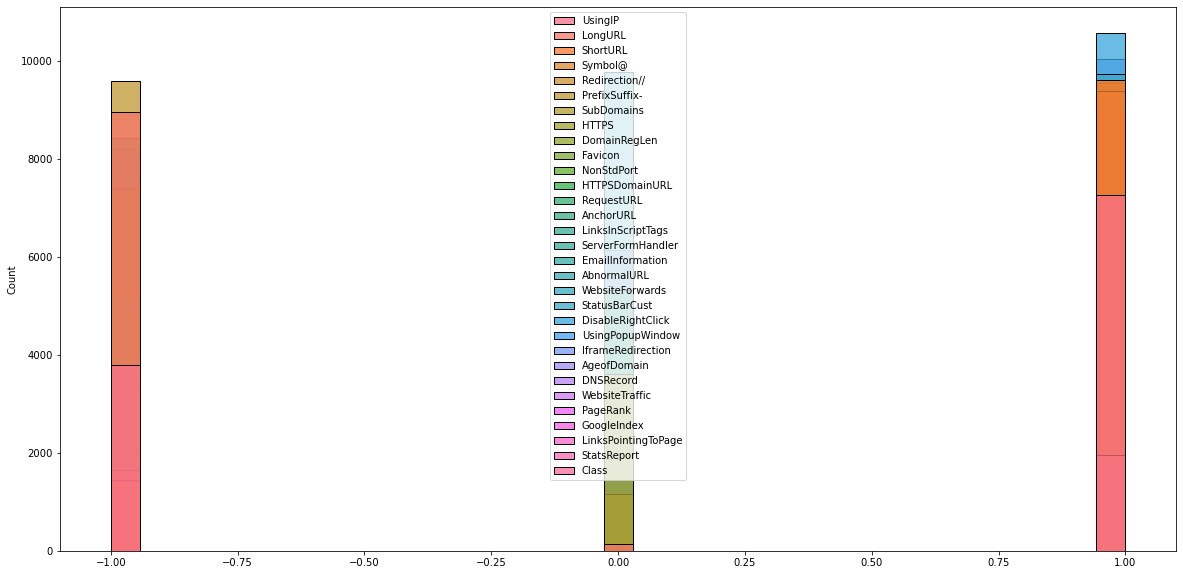

In [10]:
plt.figure(figsize=(20,10))
sns.histplot(data);

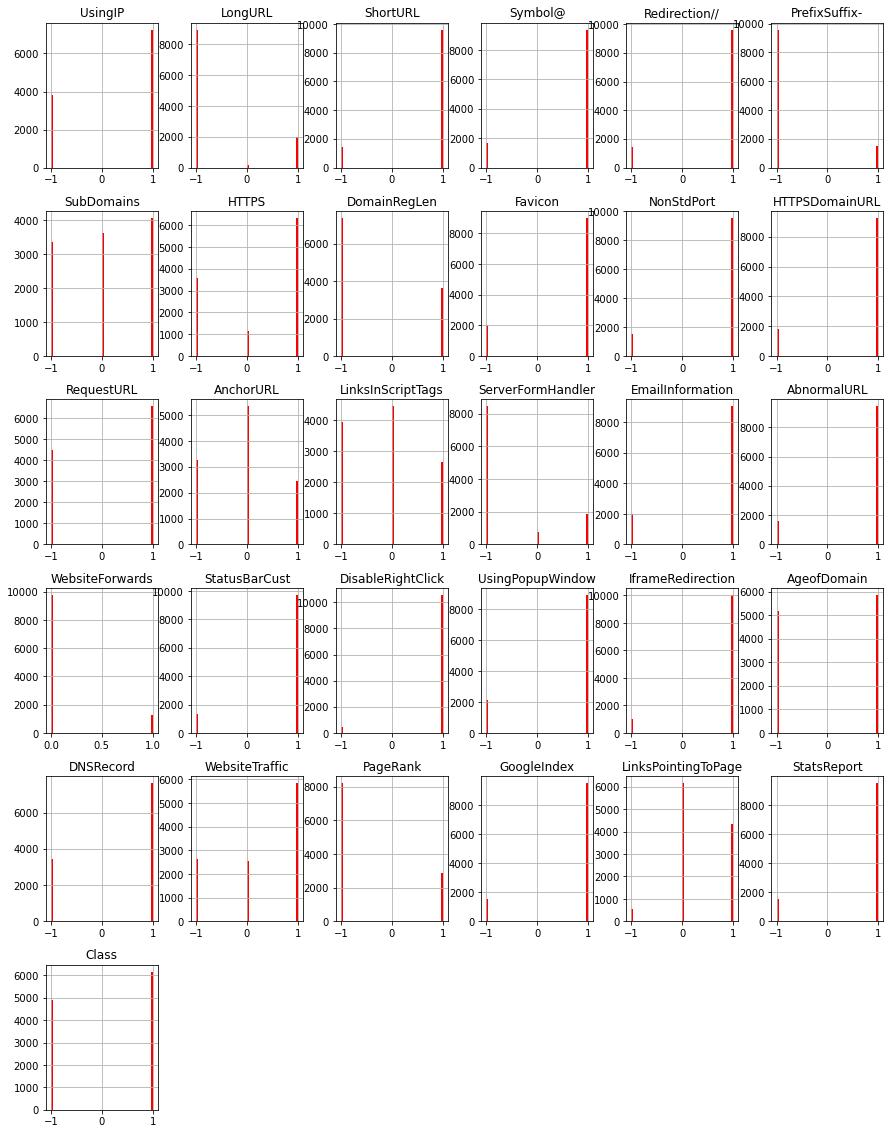

In [11]:
data.hist(bins=50,figsize=(15,20),color='red')
plt.show()

<AxesSubplot:ylabel='Density'>

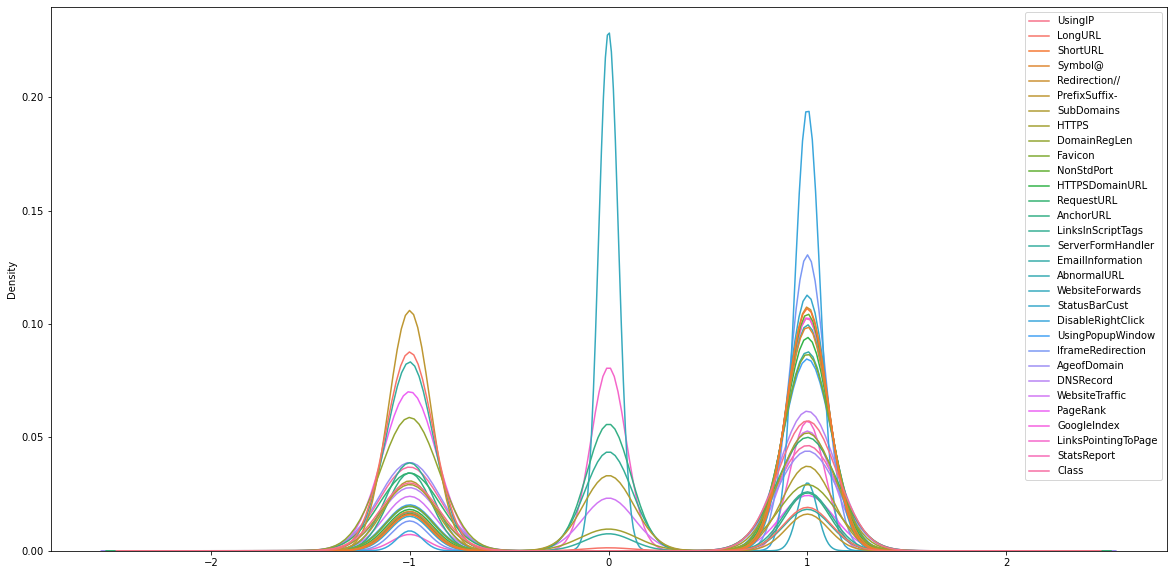

In [12]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=data,cut=10)

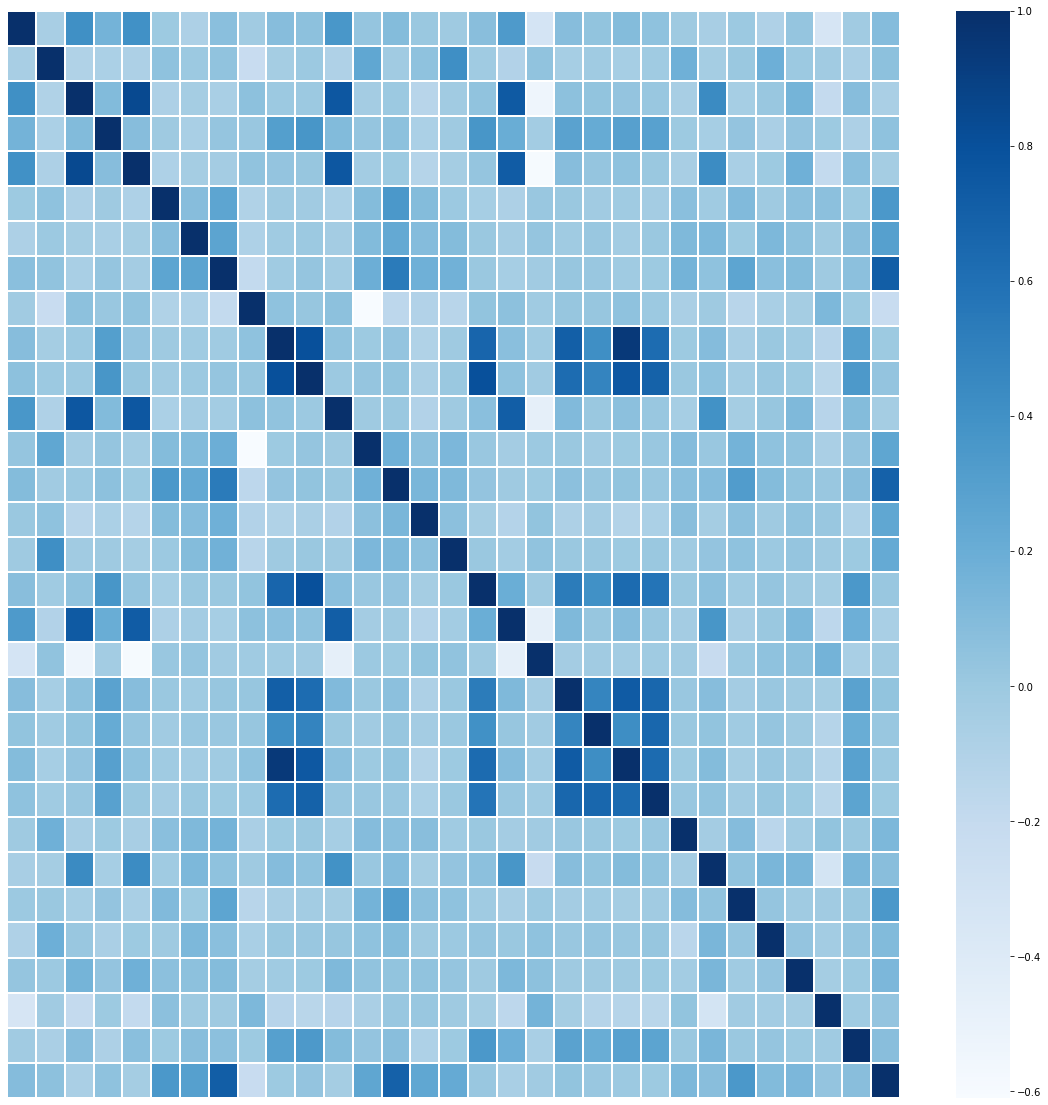

In [13]:
plt.figure(figsize = (20, 20))
sns.heatmap(data.corr(), xticklabels = False, yticklabels = False, cmap = "Blues", linewidths = 1, linecolor = "white")
plt.show()

In [14]:
def PlotCorrHeatmap(data, idx_s, idx_e):
    y = data['Class']
    temp = data.iloc[:, idx_s:idx_e]
    temp['Class'] = y
    sns.set(rc = {'figure.figsize':(10,5)})
    sns.heatmap(temp.corr(), annot=True, fmt='.2f',cmap="Blues",linewidths=1,linecolor="white")
    plt.show()

<ipython-input-14-d88735d92e9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Class'] = y


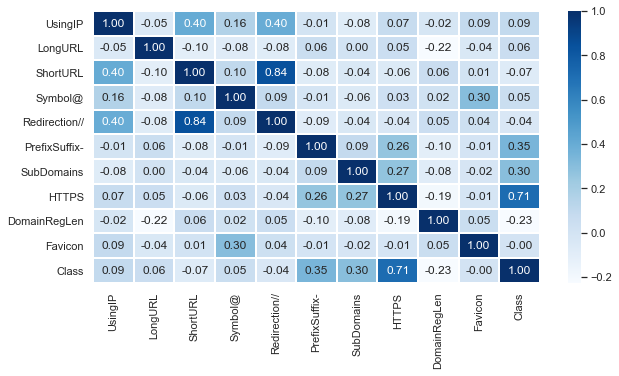

In [15]:
PlotCorrHeatmap(data, 0, 10)

<ipython-input-14-d88735d92e9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Class'] = y


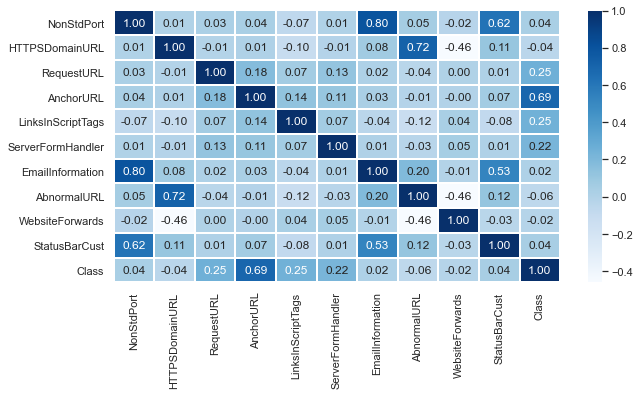

In [16]:
PlotCorrHeatmap(data, 10, 20)

<ipython-input-14-d88735d92e9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Class'] = y


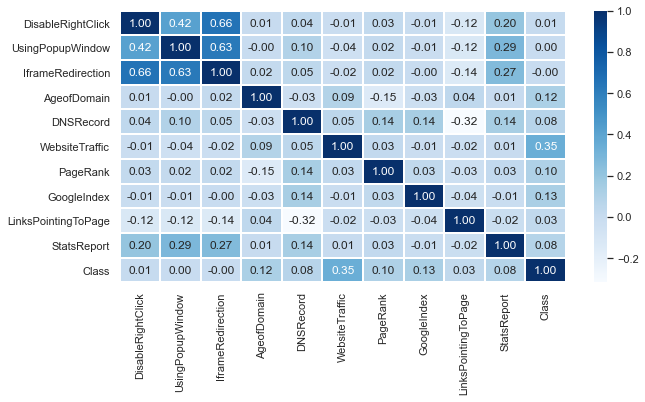

In [17]:
PlotCorrHeatmap(data, 20, 30)

<AxesSubplot:>

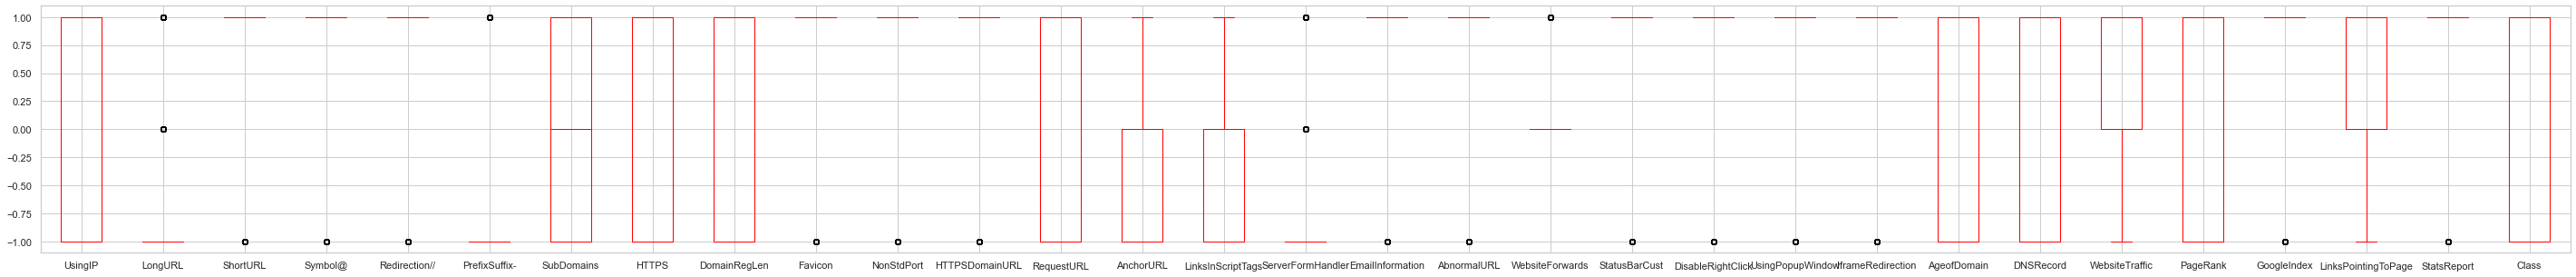

In [18]:
sns.set(style = 'whitegrid')
data.boxplot(figsize = (50, 5), color = 'red')

Training and Testing

In [19]:
from sklearn.model_selection import train_test_split,cross_val_score

Splitting Dataset

In [20]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3)

In [21]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7737, 30)
(3317, 30)
(7737, 1)
(3317, 1)


Machine Learning Models
1. LogisticRegression
2. KNeighborsClassifier
3. DecisionTreeClassifier
4. RandomForestClassifier
5. SupportVectorMachine

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Storing Data

In [23]:
ML_Model = []
Accuracy = []

def storeResults(model, accuracy):
    ML_Model.append(model)
    Accuracy.append(round(accuracy,2))

In [24]:
def plotMatrix(test_Y, predict_y):
    
    C = confusion_matrix(test_Y, predict_y)
    
    plt.figure(figsize=(5,3))
    labels = [1,2]
    cmap=sns.light_palette("deepskyblue")
    
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion Matrix")
    
    plt.show()

1. LogisticRegression

In [25]:
lr = LogisticRegression()
model1 = lr.fit(train_X, train_Y)
lrPredict = model1.predict(test_X)

C:\Users\lekha khobrekar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Performance Evalution

In [26]:
lrAccuracy = accuracy_score(lrPredict, test_Y)
lrAccuracy

0.926439553813687

Logistic Regression Classification Report

In [27]:
print(classification_report(lrPredict, test_Y))

              precision    recall  f1-score   support

          -1       0.91      0.92      0.91      1415
           1       0.94      0.93      0.94      1902

    accuracy                           0.93      3317
   macro avg       0.92      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



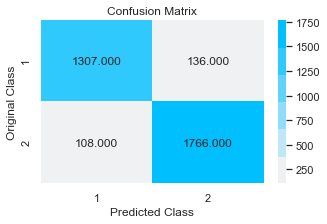

In [28]:
plotMatrix(test_Y, lrPredict)

In [29]:
storeResults('LogisticRegression', lrAccuracy)

2. KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors = 3)
model2 = knn.fit(train_X, train_Y)
knnPredict = model2.predict(test_X)

C:\Users\lekha khobrekar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Performance Evalution

In [31]:
knnAccuracy = accuracy_score(knnPredict,test_Y)
knnAccuracy

0.9445281881217968

KNeighbors Classification Report

In [32]:
print(classification_report(knnPredict, test_Y))

              precision    recall  f1-score   support

          -1       0.93      0.94      0.94      1437
           1       0.95      0.95      0.95      1880

    accuracy                           0.94      3317
   macro avg       0.94      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317



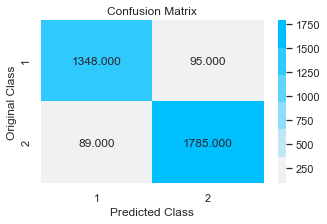

In [33]:
plotMatrix(test_Y, knnPredict)

In [34]:
storeResults('KNeighborsClassifier', knnAccuracy)

3. DecisionTreeClassifier

In [35]:
tree = DecisionTreeClassifier()
model3 = tree.fit(train_X,train_Y)
treePredict = model3.predict(test_X)

Performance Evalution

In [36]:
treeAccuracy = accuracy_score(treePredict, test_Y)
treeAccuracy

0.962315345191438

Decision Tree Classification Report

In [37]:
print(classification_report(treePredict, test_Y))

              precision    recall  f1-score   support

          -1       0.95      0.96      0.96      1432
           1       0.97      0.96      0.97      1885

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



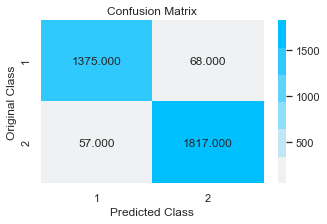

In [38]:
plotMatrix(test_Y, treePredict)

In [39]:
storeResults('DecisionTreeClassifier', treeAccuracy)

4. RandomForestClassifier

In [40]:
rf = RandomForestClassifier()
model4 = rf.fit(train_X, train_Y)
rfPredict = model4.predict(test_X)

<ipython-input-40-4cba72f93203>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4 = rf.fit(train_X, train_Y)


Performance Evalution

In [41]:
rfAccuracy = accuracy_score(rfPredict, test_Y)
rfAccuracy

0.969550798914682

Random Forest Classification Report

In [42]:
print(classification_report(rfPredict, test_Y))

              precision    recall  f1-score   support

          -1       0.96      0.97      0.96      1432
           1       0.98      0.97      0.97      1885

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



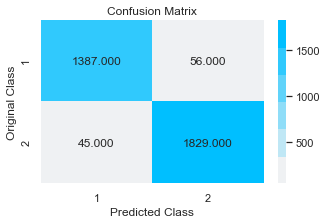

In [43]:
plotMatrix(test_Y, rfPredict)

In [44]:
storeResults('RandomForestClassifier', rfAccuracy)

5. SupportVectorMachine

In [45]:
svc = SVC()
model5 = svc.fit(train_X, train_Y)
svcPredict = model5.predict(test_X)

C:\Users\lekha khobrekar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Performance Evalution

In [46]:
svcAccuracy = accuracy_score(svcPredict, test_Y)
svcAccuracy

0.9463370515526078

Support Vector Machine Classification Report

In [47]:
print(classification_report(svcPredict, test_Y))

              precision    recall  f1-score   support

          -1       0.93      0.95      0.94      1405
           1       0.96      0.94      0.95      1912

    accuracy                           0.95      3317
   macro avg       0.94      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



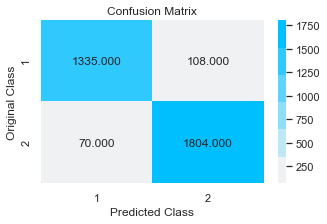

In [48]:
plotMatrix(test_Y, svcPredict)

In [49]:
storeResults('SupportVectorMachine', svcAccuracy)

Results

In [50]:
print('Logistic Regression Accuracy:',accuracy_score(lrPredict,test_Y))
print('K-Nearest Neighbour Accuracy:',accuracy_score(knnPredict,test_Y))
print('Decision Tree Classifier Accuracy:',accuracy_score(treePredict,test_Y))
print('Random Forest Classifier Accuracy:',accuracy_score(rfPredict,test_Y))
print('support Vector Machine Accuracy:',accuracy_score(svcPredict,test_Y))

Logistic Regression Accuracy: 0.926439553813687
K-Nearest Neighbour Accuracy: 0.9445281881217968
Decision Tree Classifier Accuracy: 0.962315345191438
Random Forest Classifier Accuracy: 0.969550798914682
support Vector Machine Accuracy: 0.9463370515526078


Model Evaluation

In [51]:
results = pd.DataFrame({'Model' : ML_Model,
                        'Accuracy' : Accuracy})
results

,Model,Accuracy
0,LogisticRegression,0.93
1,KNeighborsClassifier,0.94
2,DecisionTreeClassifier,0.96
3,RandomForestClassifier,0.97
4,SupportVectorMachine,0.95


Sorted Data

In [52]:
results.sort_values(by=['Accuracy'], ascending=False)

,Model,Accuracy
3,RandomForestClassifier,0.97
2,DecisionTreeClassifier,0.96
4,SupportVectorMachine,0.95
1,KNeighborsClassifier,0.94
0,LogisticRegression,0.93


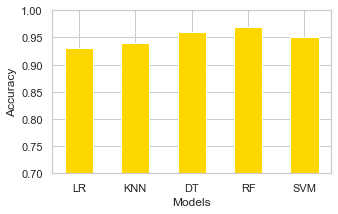

In [53]:
plt.figure(figsize=(5,3))
labels = ['LR', 'KNN', 'DT', 'RF', 'SVM']
plt.bar(ML_Model, Accuracy, tick_label = labels,width = 0.5, color = ['gold'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim((0.7,1.0))
plt.show()